In [35]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
import numpy as np

def read_binary_matrix(filename):
    with open(filename, 'rb') as file:
        # Read the number of rows and columns
        num_rows = np.fromfile(file, dtype=np.int32, count=1)[0]
        num_cols = np.fromfile(file, dtype=np.int32, count=1)[0]
        
        # Read the data as a 1D array
        data = np.fromfile(file, dtype=np.float64)
        
        # Reshape the data into a matrix
        matrix = np.reshape(data, (num_rows, num_cols))
        
        return matrix
    
def read_binary_vector(filename):
    with open(filename, 'rb') as file:
        # Read the number of rows and columns
        num_rows = np.fromfile(file, dtype=np.int32, count=1)[0]
        
        # Read the data as a 1D array
        vector = np.fromfile(file, dtype=np.float64)
        
        return vector

In [36]:
import glob

directory = '/Users/damynchipman/packages/EllipticForest/build-feature-adaptive-build/examples/toybox/'
file_pattern = '*.bin'

file_list = glob.glob(directory + '/' + file_pattern)

data = {}
for file in file_list:
    filename = file.split('/')[-1]
    if "vector" in filename:
        data[filename[:-4]] = read_binary_vector(file)
    elif "matrix" in filename:
        data[filename[:-4]] = read_binary_matrix(file)


In [30]:
left_step = '1'
right_step = '2'
left_patch = '00'
right_patch = '00'
operator = 'matrix_T'
np.max(data['step-' + left_step + '-p' + left_patch + '-' + operator] - data['step-' + right_step + '-p' + right_patch + '-' + operator])

0.0

In [31]:
quad_refined = "03"
paths = ["0", "00", "01", "02", "03", quad_refined + "0", quad_refined + "1", quad_refined + "2", quad_refined + "3"]
operators = ["matrix_T", "matrix_S", "vector_g", "vector_u", "vector_h", "vector_w"]
for path in paths:
    for operator in operators:
        step1 = data['step-1' + '-p' + path + '-' + operator]
        step2 = data['step-2' + '-p' + path + '-' + operator]
        err = math.inf
        try:
            err = np.max(step1 - step2)
        except:
            print('path: %s, operator: %s, sizes: (1) %i, (2) %i' % (path, operator, np.size(step1), np.size(step2)))
            continue
        print('path: %s, operator: %s, diff = %.8e' % (path, operator, err))
    print()


path: 0, operator: matrix_T, diff = 0.00000000e+00
path: 0, operator: matrix_S, diff = 0.00000000e+00
path: 0, operator: vector_g, diff = 0.00000000e+00
path: 0, operator: vector_u, sizes: (1) 0, (2) 0
path: 0, operator: vector_h, diff = 2.40780179e-03
path: 0, operator: vector_w, diff = 2.99202964e-03

path: 00, operator: matrix_T, diff = 0.00000000e+00
path: 00, operator: matrix_S, sizes: (1) 0, (2) 0
path: 00, operator: vector_g, diff = 2.73842969e-03
path: 00, operator: vector_u, diff = 2.66427675e-03
path: 00, operator: vector_h, diff = 0.00000000e+00
path: 00, operator: vector_w, sizes: (1) 0, (2) 0

path: 01, operator: matrix_T, diff = 0.00000000e+00
path: 01, operator: matrix_S, sizes: (1) 0, (2) 0
path: 01, operator: vector_g, diff = 2.99202964e-03
path: 01, operator: vector_u, diff = 2.81613855e-03
path: 01, operator: vector_h, diff = 0.00000000e+00
path: 01, operator: vector_w, sizes: (1) 0, (2) 0

path: 02, operator: matrix_T, diff = 0.00000000e+00
path: 02, operator: matri

In [49]:
# Read the CSV file into a DataFrame
full_df = pd.read_csv(directory + 'error-full.csv')
adaptive_df = pd.read_csv(directory + 'error-adaptive.csv')

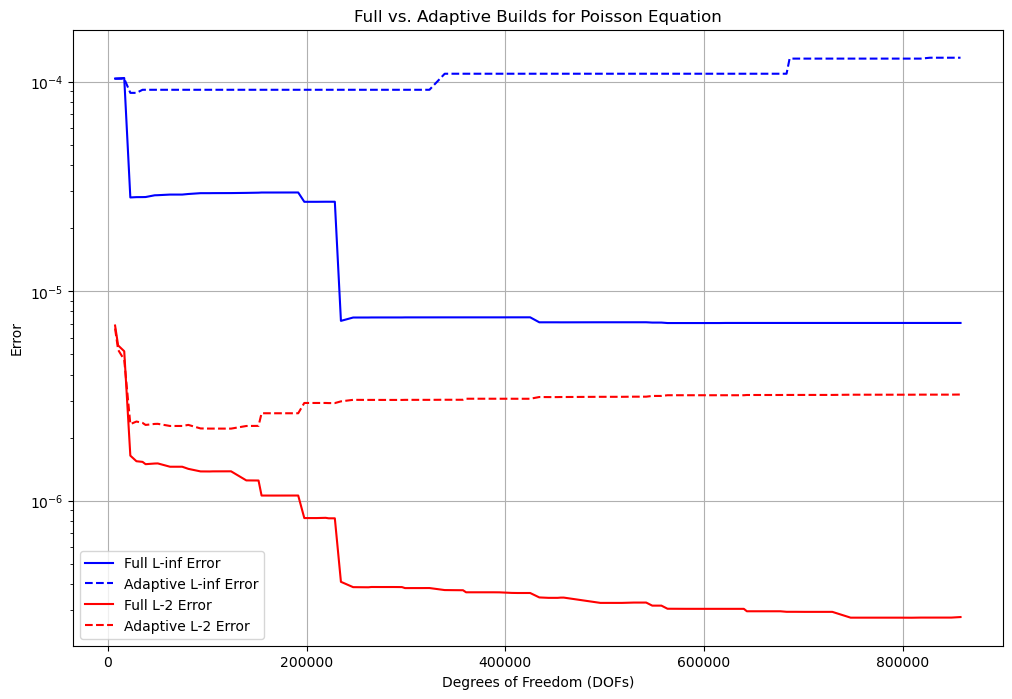

<Figure size 640x480 with 0 Axes>

In [53]:

# Create figure
plt.figure(figsize=(12, 8))

# Plot for full and adaptive methods
plt.plot(full_df[' DOFs'], full_df[' lI'], 'b-', label='Full L-inf Error')
plt.plot(adaptive_df[' DOFs'], adaptive_df[' lI'], 'b--', label='Adaptive L-inf Error')
plt.plot(full_df[' DOFs'], full_df[' l2'], 'r-', label='Full L-2 Error')
plt.plot(adaptive_df[' DOFs'], adaptive_df[' l2'], 'r--', label='Adaptive L-2 Error')

# Adding legend, titles, and labels
plt.legend()
plt.xlabel('Degrees of Freedom (DOFs)')
plt.ylabel('Error')
plt.xscale('linear')
plt.yscale('log')
plt.title('Full vs. Adaptive Builds for Poisson Equation')
plt.grid(True)

# Show the plot
plt.show()
plt.savefig('adaptive-vs-full-build-error.pdf')
plt.savefig('adaptive-vs-full-build-error.png')
